# CatBoost inference
This notebooks demonstrates generating inferences from a pretrained CatBoost model. This notebook utilizes the `deepfuel-ML/src/test.py` script for generating inferences. The script does everything from calculating error values to plotting data for visual inference. 

In [1]:
import os
import pandas as pd
import numpy as np
from joblib import dump, load
from IPython.display import Image, display

### Using `test.py`
Below is the description of its arguements:
 - `--model_name`:  Name of the model to be trained ("CatBoost" or "LightGBM").
 - `--model_path`:  Path to the pre-trained model.
 - `--data_path`:  Valid data directory where all the test .csv files are stored.
 - `--results_path`:  Directory where the result inference .csv files and .png visualizations are going to be stored.

### With Ground Truth (`actual_load` is present in the test csv)

In [2]:
!python '../src/test.py'  --model_name 'CatBoost' --model_path '../src/results/pre-trained_models/CatBoost.joblib' --data_path 'infer_midlats'  --results_path 'midlats/results'

MAPE  Dec  : 98.83132162223278
MAPE  Aug  : 336.21451871144257
MAPE  Sept  : 176.26772460415702
MAPE  July  : 438.7029282308049
MAPE  Oct  : 126.7956376079501
MAPE  Nov  : 116.65896138456282
Actual FL plot successfully generated! File saved to  midlats/results/midlats_Aug_actual.png
Predicted FL plot successfully generated! File saved to  midlats/results/midlats_Aug_predicted.png
Actual FL plot successfully generated! File saved to  midlats/results/midlats_Nov_actual.png
Predicted FL plot successfully generated! File saved to  midlats/results/midlats_Nov_predicted.png
Actual FL plot successfully generated! File saved to  midlats/results/midlats_July_actual.png
Predicted FL plot successfully generated! File saved to  midlats/results/midlats_July_predicted.png
Actual FL plot successfully generated! File saved to  midlats/results/midlats_Oct_actual.png
Predicted FL plot successfully generated! File saved to  midlats/results/midlats_Oct_predicted.png
Actual FL plot successfully generated! 

### Inference CSV
`test.py` generates `.csv` files for each month with the following columns:
 - `latitude`
 - `longitude`
 - `actual_load` - Actual Fuel Load value
 - `predicted_load`  - Predicted Fuel Load value
 - `APE` - Average Percentage Error between actual and predicted fuel load values

In [3]:
df=pd.read_csv('midlats/results/midlats_output_July.csv')
df.head()

,lat,lon,actual_load,predicted_load,APE
0,-35.125,-69.375,9.188477e+07,1.062984e+08,15.686665
1,-31.625,27.875,7.486465e+07,5.506942e+08,635.586482
2,-31.375,28.375,6.728101e+07,4.693479e+08,597.593399
3,-31.125,28.625,9.200570e+07,5.590496e+08,507.625004
4,-31.125,29.625,1.413486e+08,4.773372e+08,237.702174


### Visualizing the plots generated

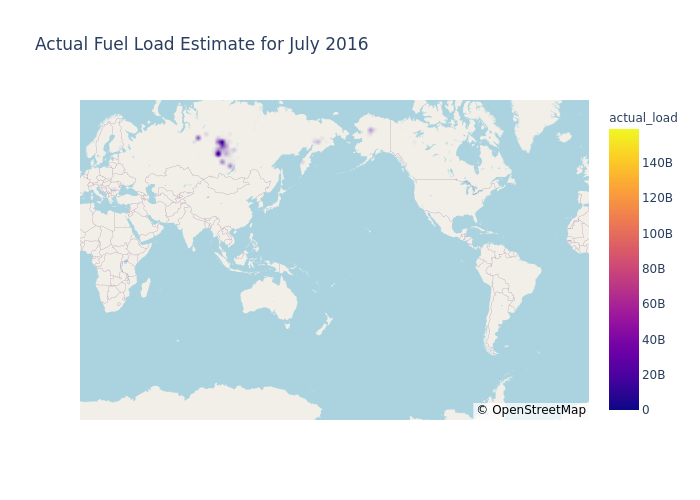

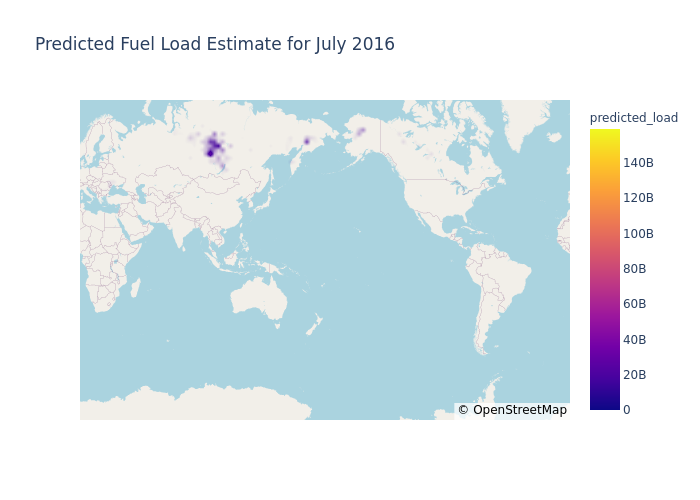

In [4]:
actual=Image(filename='midlats/results/midlats_July_actual.png') 
predicted=Image(filename='midlats/results/midlats_July_predicted.png') 
display(actual,predicted)

### Without Ground Truth (`actual_load` is not present in the test csv)

In [5]:
!python '../src/test.py'  --model_name 'CatBoost' --model_path '../src/results/pre-trained_models/CatBoost.joblib' --data_path 'infer_midlats'  --results_path 'midlats/results'

Predicted FL plot successfully generated! File saved to  midlats/results/midlats_Aug_predicted.png
Predicted FL plot successfully generated! File saved to  midlats/results/midlats_Nov_predicted.png
Predicted FL plot successfully generated! File saved to  midlats/results/midlats_July_predicted.png
Predicted FL plot successfully generated! File saved to  midlats/results/midlats_Oct_predicted.png
Predicted FL plot successfully generated! File saved to  midlats/results/midlats_Dec_predicted.png
Predicted FL plot successfully generated! File saved to  midlats/results/midlats_Sept_predicted.png


### Inference CSV

In [6]:
df=pd.read_csv('midlats/results/midlats_output_July.csv')
df.head()

,lat,lon,predicted_load
0,-35.125,-69.375,3.875218e+07
1,-31.625,27.875,1.914038e+08
2,-31.375,28.375,1.623606e+08
3,-31.125,28.625,1.944151e+08
4,-31.125,29.625,1.651908e+08


In [7]:
### Visualizing the plots generated

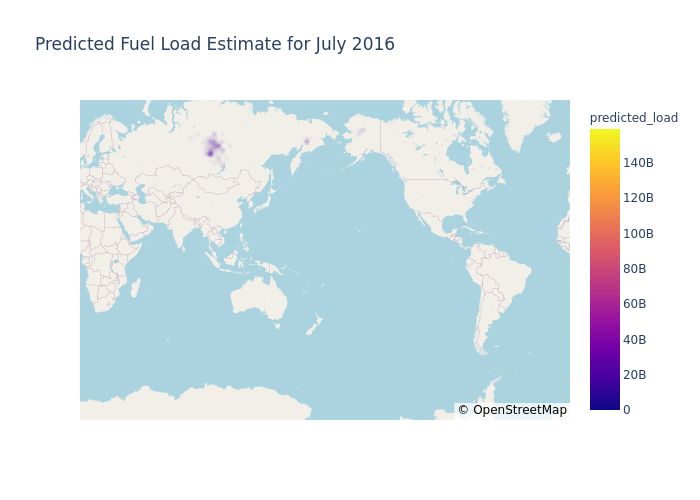

In [8]:
predicted=Image(filename='midlats/results/midlats_July_predicted.png') 
display(predicted)